In [19]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot') 

## 1. Format the Data

In [14]:
air = pd.read_csv('../../assets/datasets/airport2.csv') # read in csv

In [15]:
# air.head() # Check top 5 rows of airline data
# air.shape  # Observe the shape
air.columns  # See what columns exist

Index([u'Airport', u'Year', u'Departure Cancellations',
       u'Arrival Cancellations', u'Departure Diversions',
       u'Arrival Diversions'],
      dtype='object')

Convert the class labels, in this case the airports, to numeric. *Remember*, we've truncated the airport dataset for simplicty to make this part easy! 

In [16]:
from sklearn.preprocessing import LabelEncoder # Encode labels

le = LabelEncoder()                            # Assign function


In [17]:
air['Airport_Cat'] = le.fit_transform(air['Airport']) # Create new column for categorical airport info

## 2. Plot the data

In [45]:
pp_cats = [x for x in air.columns if x not in ['Airport']] # Create mask for pairplot

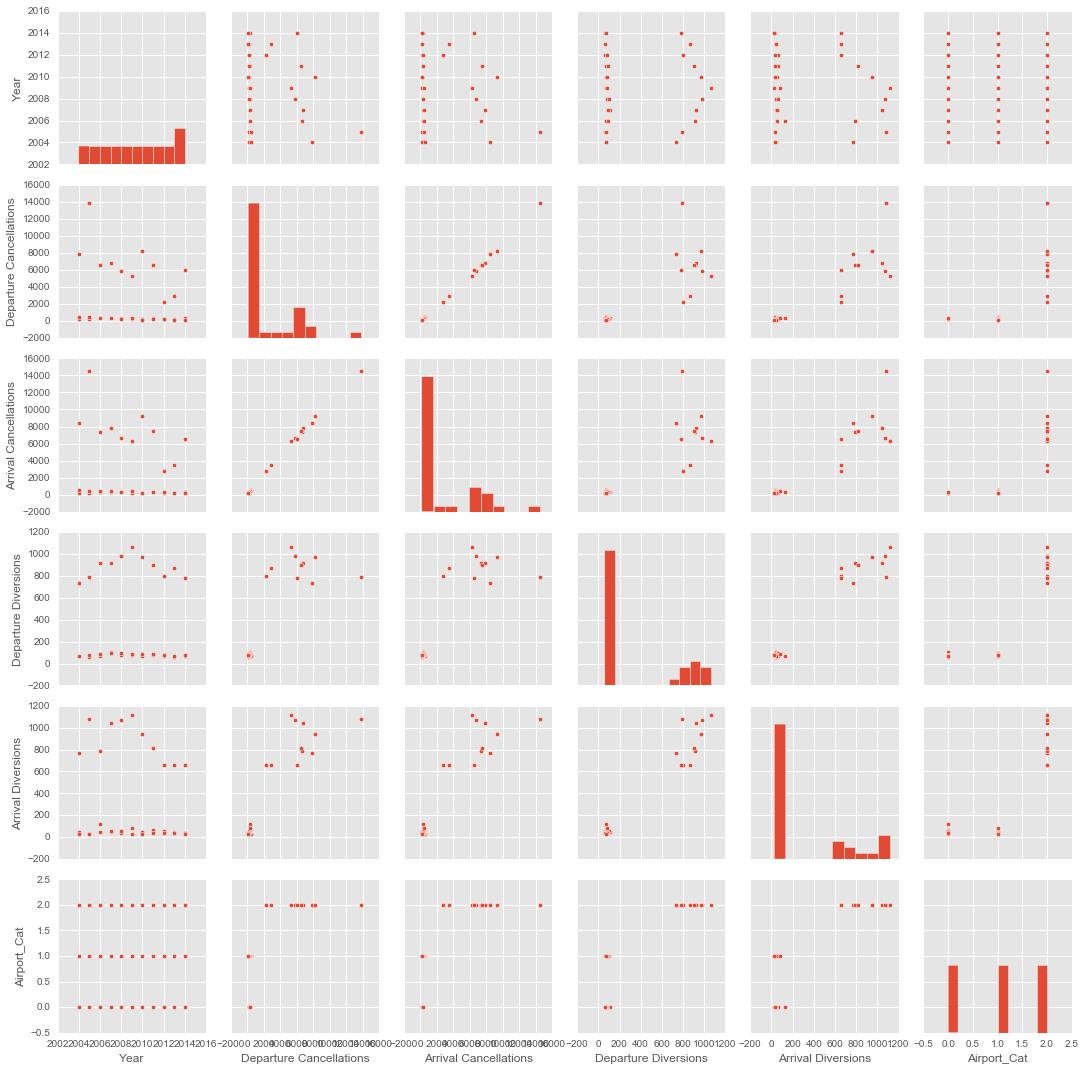

In [46]:
sns.pairplot(air[pp_cats]) # prepare pairplot, unscaled

In [88]:
airn = (air[pp_cats] - air[pp_cats].mean())/air[pp_cats].std() # normalize

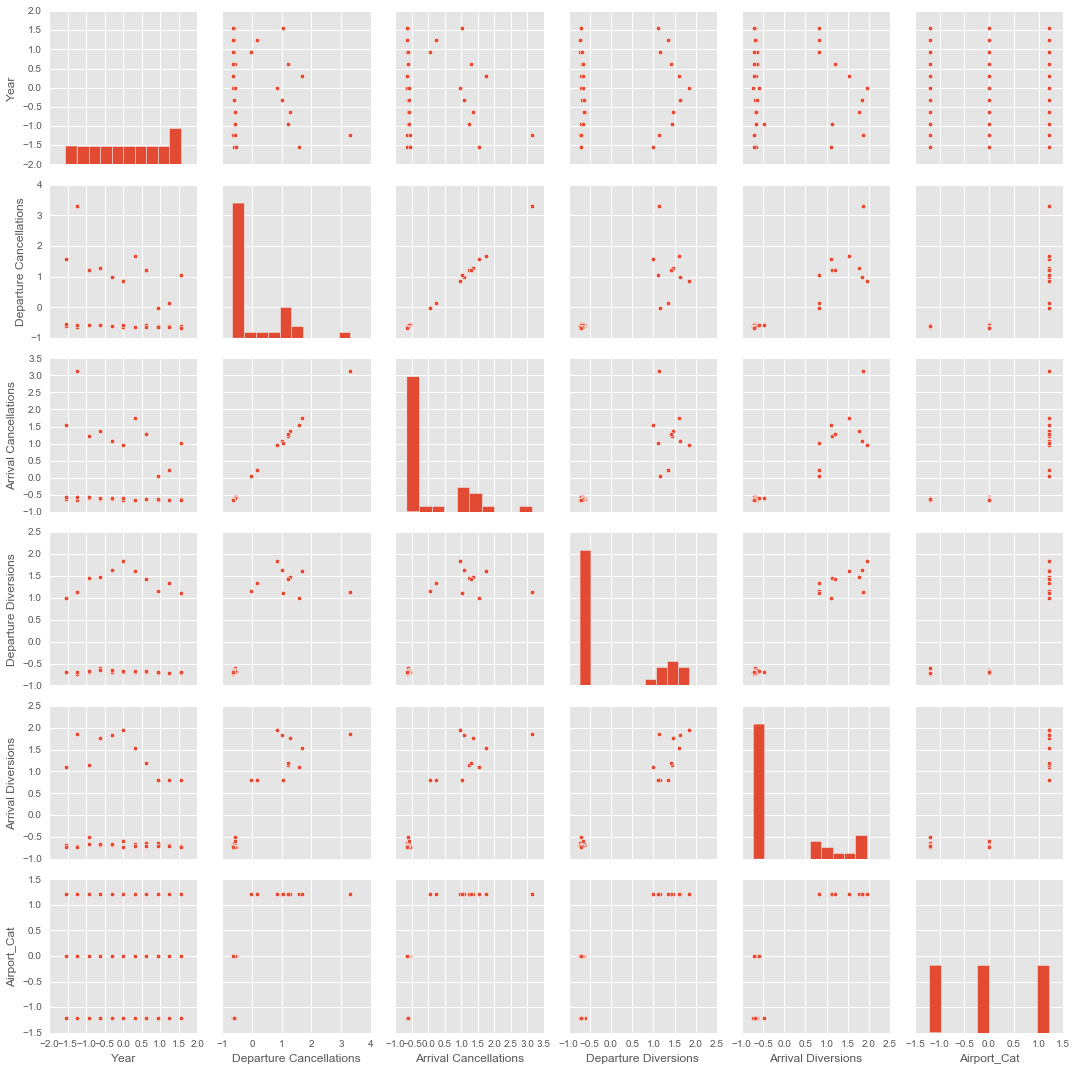

In [89]:
sns.pairplot(airn) # plot normalized

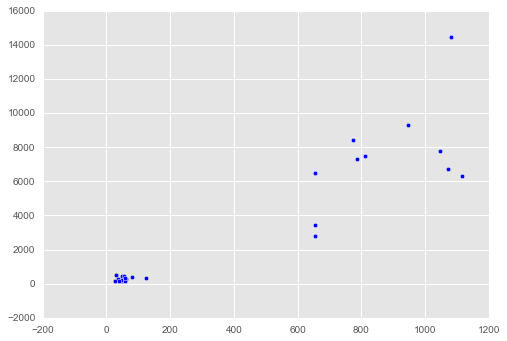

In [47]:
plt.scatter(x="Arrival Diversions", y="Arrival Cancellations", data=air)

## 3.  Perform a K-Means Clustering 

#### 3.1 Split the dataset into the attribute data and class labels

In [90]:
X = airn[["Arrival Diversions", "Arrival Cancellations"]] # Attribute data
Y = air['Airport_Cat']                                    # Class labels

#### 3.2 Conduct the k-means clustering

In [91]:
from sklearn.cluster import KMeans

In [92]:
km = KMeans(n_clusters= len(Y.unique())) # 

In [93]:
x_km = km.fit(X)

#### 3.3 Compute the labels and centroids

In [94]:
x_km.cluster_centers_

array([[-0.67310295, -0.62004689],
       [ 1.29532252,  1.05045985],
       [ 1.85503967,  3.13643315]])

#### 3.4 Format the resulting predicted clusters and check the inertia, silhouette, and elbow metric.

In [95]:
from sklearn.metrics import silhouette_score

In [96]:
x_km.inertia_

4.4827856224651681

In [97]:
x_km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [98]:
air['class'] = x_km.labels_

In [99]:
silhouette_score(X, x_km.labels_)

0.8349912504864796

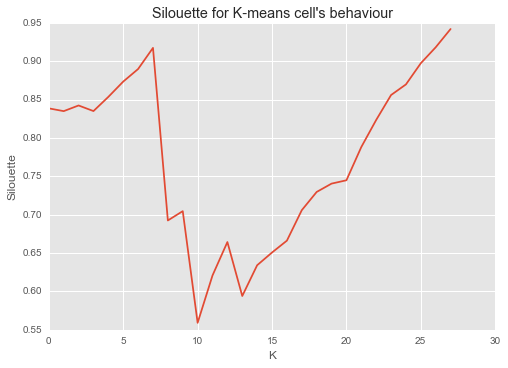

In [100]:
scores = []
SSE = []

for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    
    scores.append(silhouette_score(X, labels, metric='euclidean'))
    SSE.append(inertia.mean())

plt.plot(scores)
plt.ylabel("Silouette")
plt.xlabel("K")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()

**Question**: What are we understand from this these performance metrics? 

** Inertia ** - Inertia 
** Silhouette ** - Measures the 
** Elbow ** 

## KNN Classifier

Select a target, and attempt to train your model against it.

## 4. KNN Classifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

In [78]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [80]:
predicted = knn.predict(x_test)

In [85]:
print list(predicted)
print list(y_test)

[2, 1, 1, 1, 2, 1, 0, 0, 0, 1]
[2, 1, 0, 0, 2, 1, 0, 1, 0, 0]


** \*BONUS BONUS\* **

We haven't gone over hierarchical clustering but we may review this in class briefly, then in more depth in the future.

## 5. Hierarchical Clustering

#### 6.1 Create the linkage for clustering

In [110]:
ward = linkage(X, 'ward')
c, coph_dist = cophenet(ward, pdist(X))

In [111]:
ward[0]

array([  1.00000000e+01,   1.80000000e+01,   3.41650122e-03,
         2.00000000e+00])

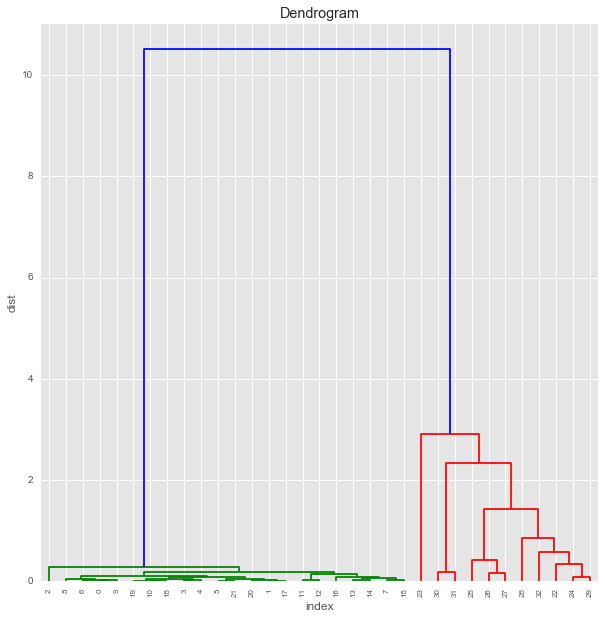

In [114]:
plt.figure(figsize=(10,10))
plt.title('Dendrogram')
plt.xlabel('index')
plt.ylabel('dist')

dendrogram(ward, leaf_rotation=90., leaf_font_size=8.)
plt.show()

#### 6.2 Plot the Denrogram

## Extra Trees Classifier

Research this method and attempt to implement it.  This is completely optional.

## 6. Extra Trees Classifier